In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams.update({'font.size': 22})

In [2]:
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [3]:
def plot_data(X,y):
    X_copy = X.copy()
    X_copy["target"] = y
    sns.pairplot(X_copy, hue = "target")
    plt.show()

C:\Users\DianaP\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


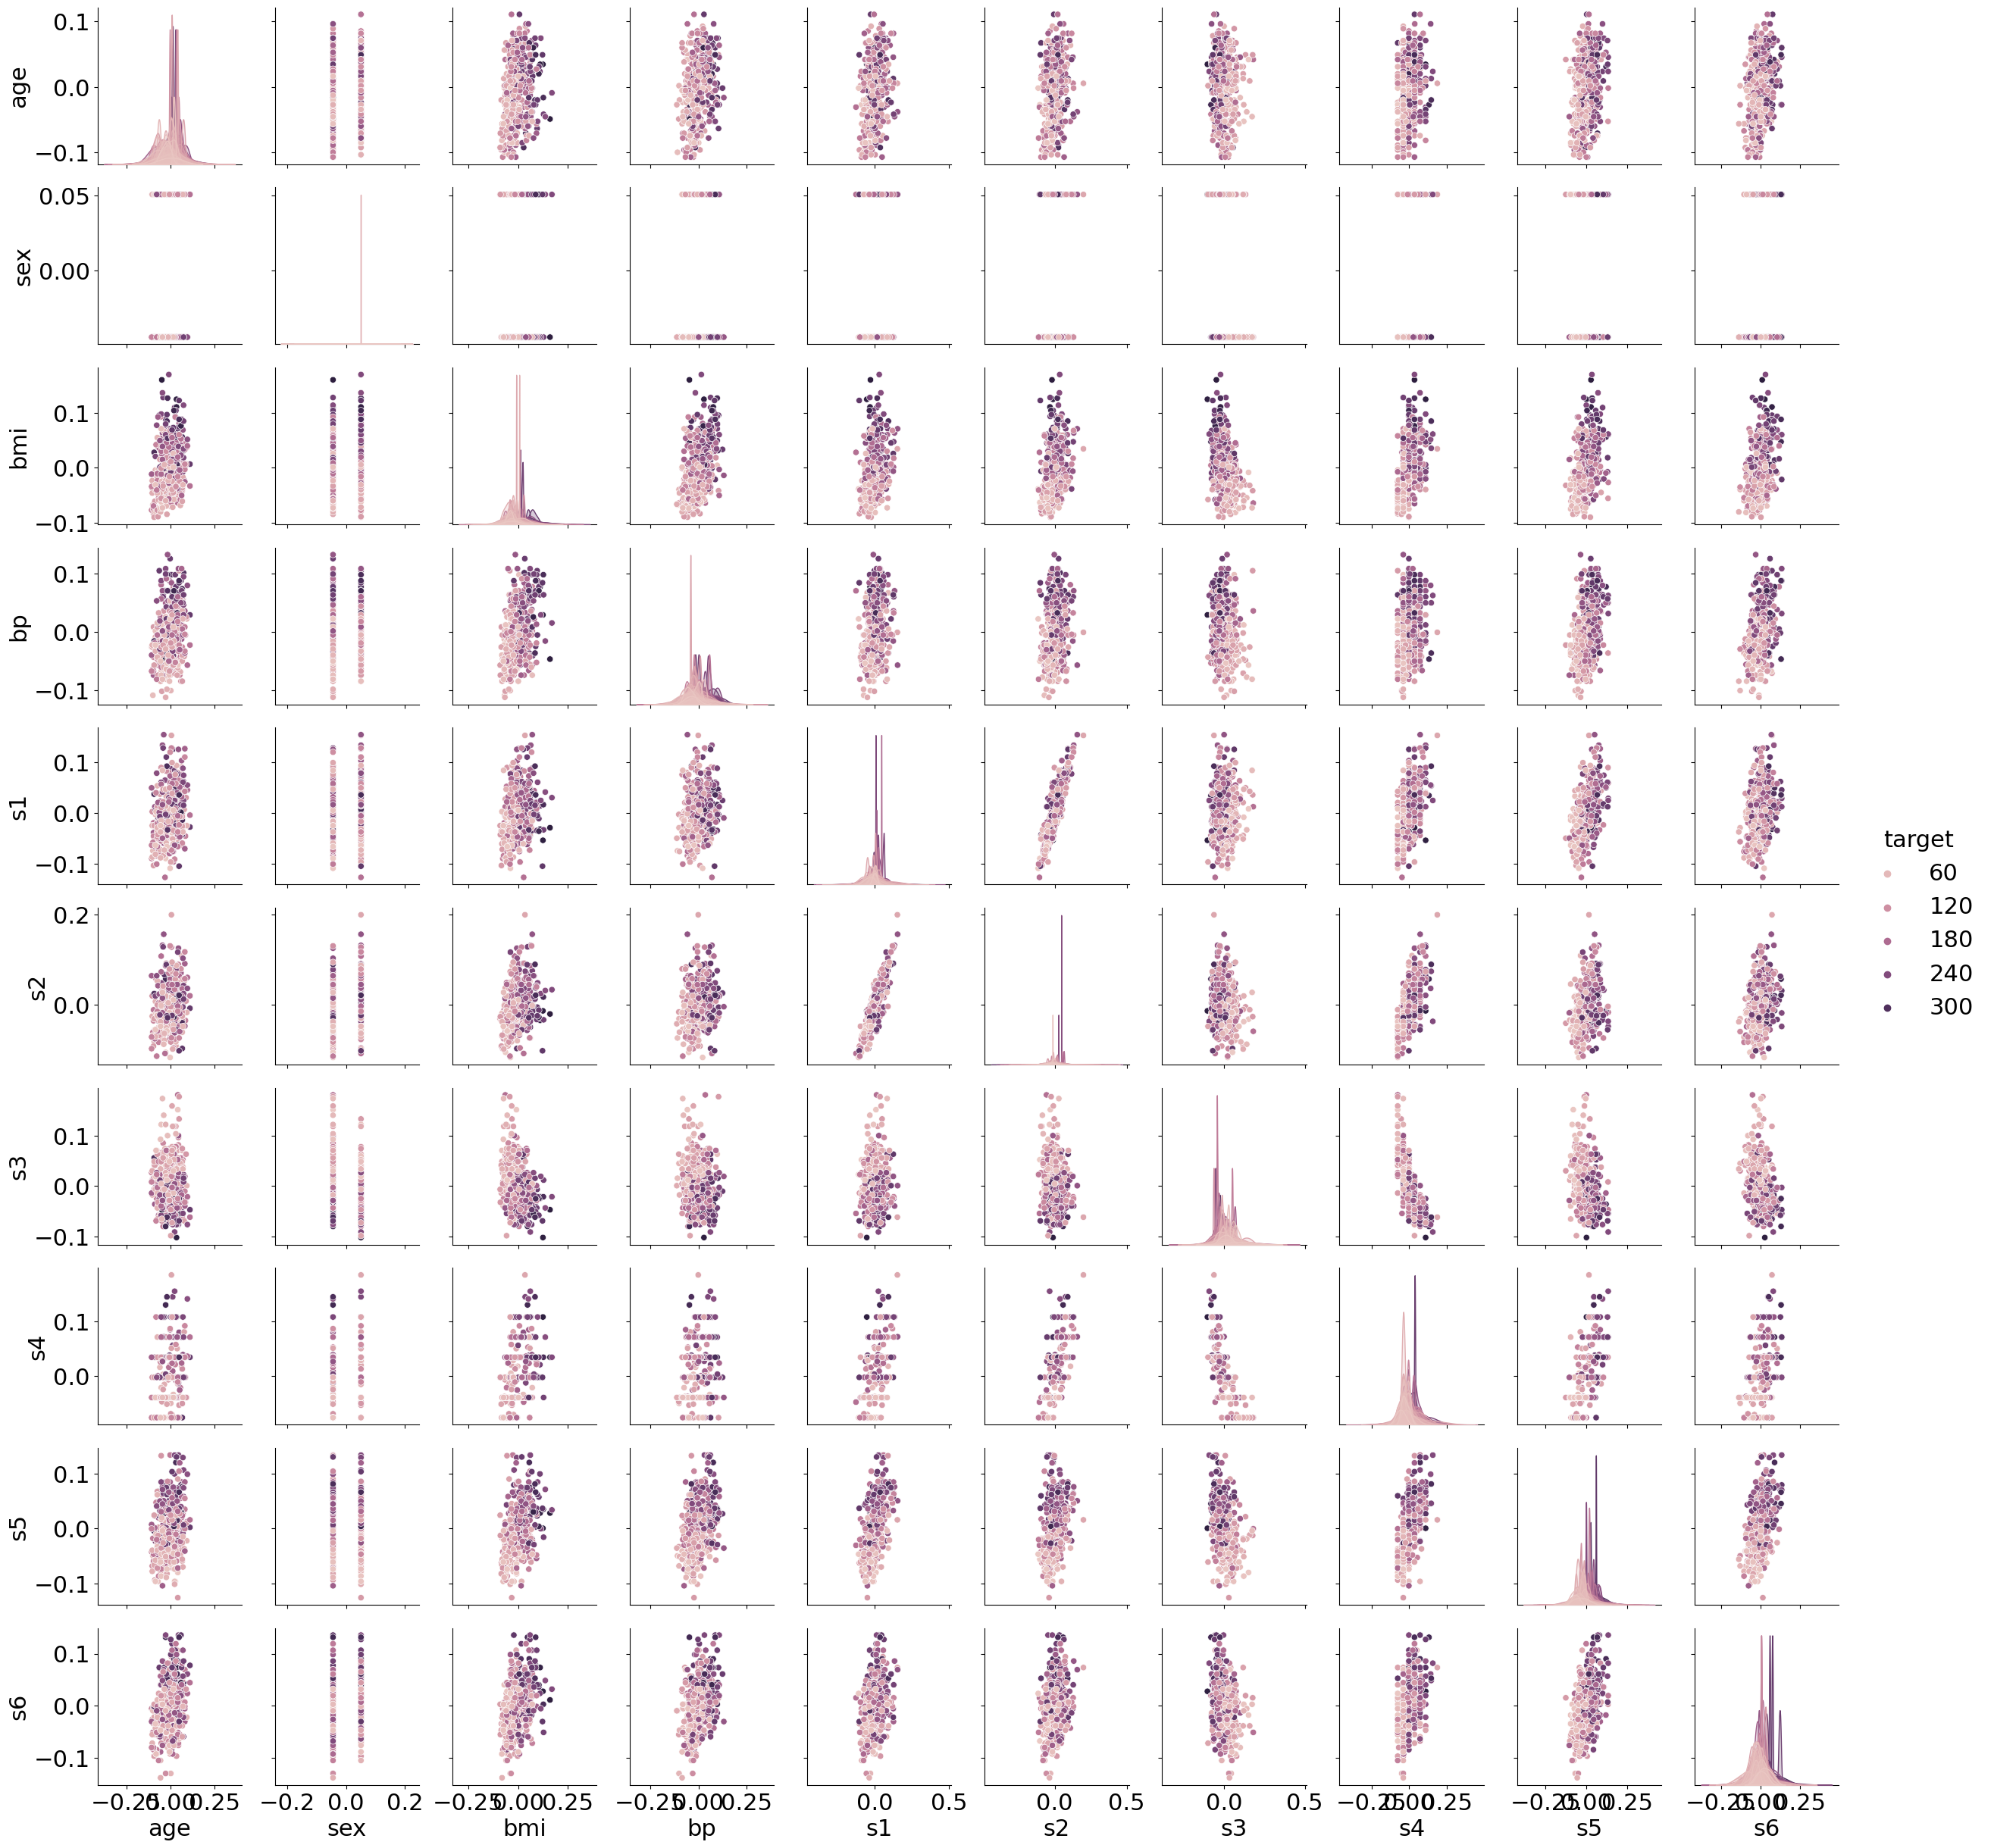

In [4]:
plot_data(X,y)

In [5]:
def plot_correlation_matrix(X,y):
    X_copy = X.copy()
    X_copy["target"] = y
    plt.figure(figsize=(10,10))
    sns.heatmap(X_copy.corr(), annot=True) #TODO: mask halve matrisen
    plt.show()

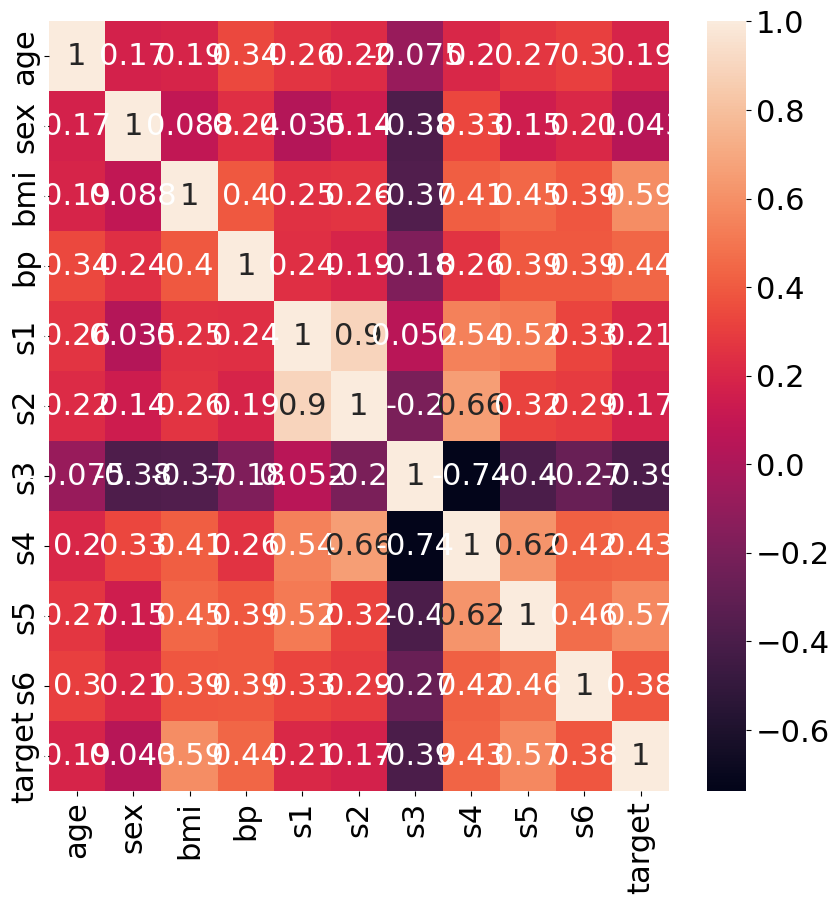

In [6]:
plot_correlation_matrix(X,y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=round((0.15 / 0.75),1), random_state=42)

C:\Users\DianaP\AppData\Local\Temp\ipykernel_19608\3540483247.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


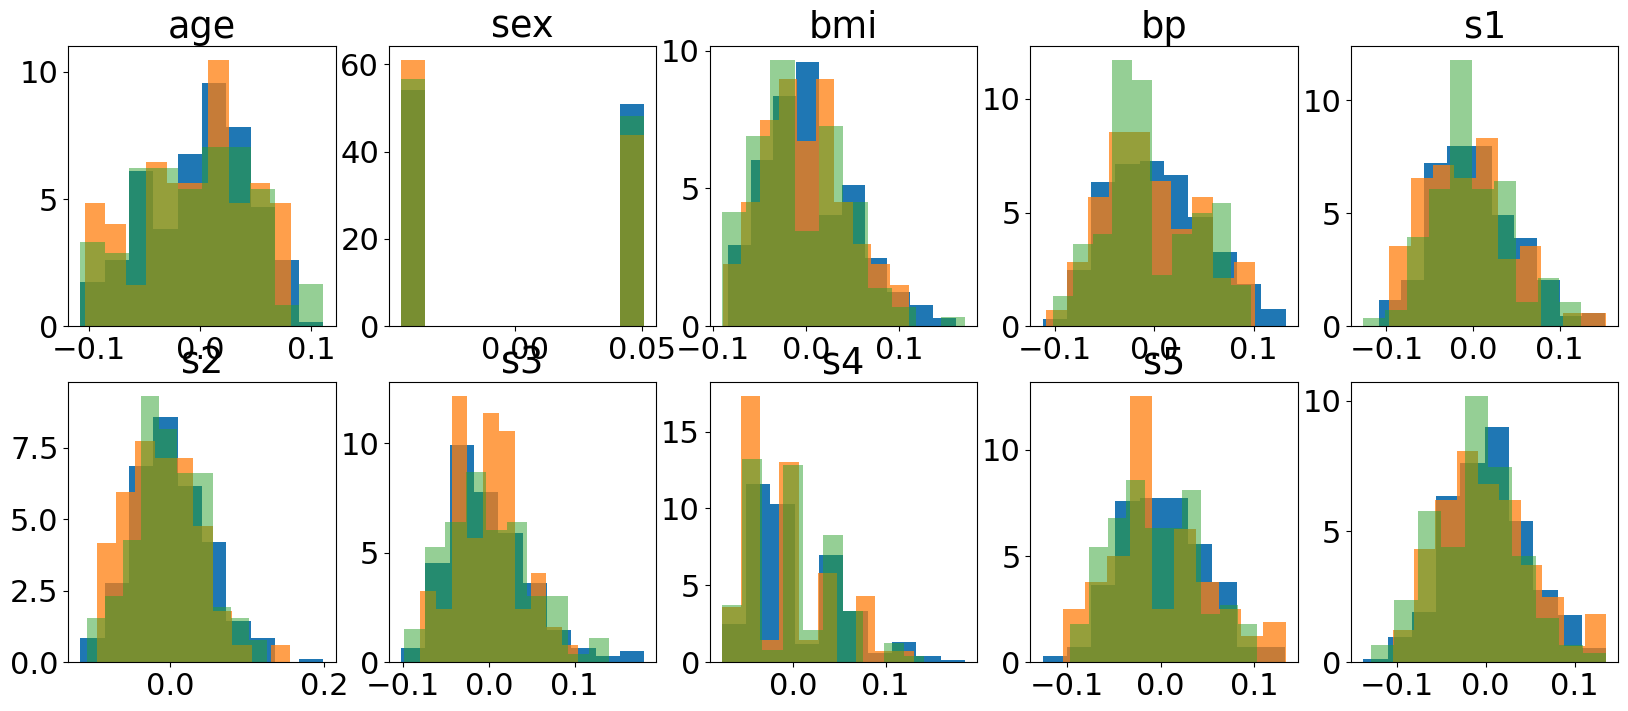

In [10]:
#TODO: plot normaliserte histogram
plt.figure(figsize=(20,8))
for i in range(X_train.shape[1]):
    plt.title(X_train.columns[i-1])
    plt.subplot(2,5,i+1)
    plt.hist(X_train.iloc[:,i], density=True, color="C0", label="train")
    plt.hist(X_val.iloc[:,i], density=True, color="C1", alpha=0.75, label="val")
    plt.hist(X_test.iloc[:,i], density=True, color="C2", alpha=0.5, label="test")
plt.show()    

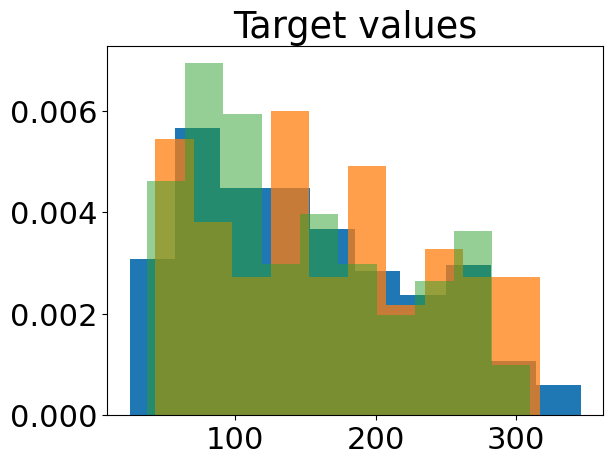

In [11]:
plt.title("Target values")
plt.hist(y_train, density=True, color="C0", label="train")
plt.hist(y_val, density=True, color="C1", alpha=0.75, label="val")
plt.hist(y_test, density=True, color="C2", alpha=0.5, label="test")
plt.show()    

In [12]:
from sklearn.linear_model import SGDRegressor

In [13]:
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error

In [14]:
SGD_reg = SGDRegressor(max_iter=12000,verbose=1)
SGD_reg.fit(X_train, y_train)

y_train_hat = SGD_reg.predict(X_train)
y_val_hat = SGD_reg.predict(X_val)

-- Epoch 1
Norm: 4.38, NNZs: 10, Bias: 87.467294, T: 264, Avg. loss: 7804.289485
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7.10, NNZs: 10, Bias: 115.683925, T: 528, Avg. loss: 4161.318503
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.37, NNZs: 10, Bias: 130.115510, T: 792, Avg. loss: 3358.402392
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.40, NNZs: 10, Bias: 138.047226, T: 1056, Avg. loss: 3105.683081
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 13.28, NNZs: 10, Bias: 142.710714, T: 1320, Avg. loss: 3012.583086
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 15.06, NNZs: 10, Bias: 145.851138, T: 1584, Avg. loss: 2971.155278
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 16.74, NNZs: 10, Bias: 147.553507, T: 1848, Avg. loss: 2951.048366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 18.36, NNZs: 10, Bias: 148.730043, T: 2112, Avg. loss: 2938.658791
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 19.93, NNZs: 10, Bias: 149.553291, T: 

Norm: 672.09, NNZs: 10, Bias: 147.509190, T: 1214928, Avg. loss: 1538.483817
Total training time: 0.21 seconds.
-- Epoch 4603
Norm: 672.13, NNZs: 10, Bias: 147.510884, T: 1215192, Avg. loss: 1538.457890
Total training time: 0.21 seconds.
-- Epoch 4604
Norm: 672.16, NNZs: 10, Bias: 147.513663, T: 1215456, Avg. loss: 1538.434107
Total training time: 0.21 seconds.
-- Epoch 4605
Norm: 672.20, NNZs: 10, Bias: 147.514791, T: 1215720, Avg. loss: 1538.407576
Total training time: 0.21 seconds.
-- Epoch 4606
Norm: 672.23, NNZs: 10, Bias: 147.510190, T: 1215984, Avg. loss: 1538.380769
Total training time: 0.21 seconds.
-- Epoch 4607
Norm: 672.27, NNZs: 10, Bias: 147.510018, T: 1216248, Avg. loss: 1538.358276
Total training time: 0.21 seconds.
-- Epoch 4608
Norm: 672.30, NNZs: 10, Bias: 147.510057, T: 1216512, Avg. loss: 1538.332704
Total training time: 0.21 seconds.
-- Epoch 4609
Norm: 672.34, NNZs: 10, Bias: 147.504714, T: 1216776, Avg. loss: 1538.302537
Total training time: 0.21 seconds.
-- Epo

Norm: 767.01, NNZs: 10, Bias: 147.470842, T: 2348808, Avg. loss: 1484.423732
Total training time: 0.40 seconds.
-- Epoch 8898
Norm: 767.02, NNZs: 10, Bias: 147.475048, T: 2349072, Avg. loss: 1484.416010
Total training time: 0.40 seconds.
-- Epoch 8899
Norm: 767.03, NNZs: 10, Bias: 147.473772, T: 2349336, Avg. loss: 1484.412608
Total training time: 0.40 seconds.
-- Epoch 8900
Norm: 767.05, NNZs: 10, Bias: 147.474986, T: 2349600, Avg. loss: 1484.405508
Total training time: 0.40 seconds.
-- Epoch 8901
Norm: 767.06, NNZs: 10, Bias: 147.475061, T: 2349864, Avg. loss: 1484.400167
Total training time: 0.40 seconds.
-- Epoch 8902
Norm: 767.08, NNZs: 10, Bias: 147.477752, T: 2350128, Avg. loss: 1484.394780
Total training time: 0.40 seconds.
-- Epoch 8903
Norm: 767.09, NNZs: 10, Bias: 147.479003, T: 2350392, Avg. loss: 1484.388610
Total training time: 0.40 seconds.
-- Epoch 8904
Norm: 767.10, NNZs: 10, Bias: 147.488048, T: 2350656, Avg. loss: 1484.369761
Total training time: 0.40 seconds.
-- Epo

In [15]:
print("Scoring på treningsdata:")
print("R2-score: " ,r2_score(y_train_hat,y_train))
print("MSE: ", mean_squared_error(y_train_hat,y_train))
print("MAE: ", mean_absolute_error(y_train_hat,y_train))
print("\n")
print("Scoring på valideringsdata:")
print("R2-score: " ,r2_score(y_val_hat,y_val))
print("MSE: ", mean_squared_error(y_val_hat,y_val))
print("MAE: ", mean_absolute_error(y_val_hat,y_val))

Scoring på treningsdata:
R2-score:  -0.13414306759455075
MSE:  2965.67791698745
MAE:  44.383104798735445


Scoring på valideringsdata:
R2-score:  -0.1280229731527034
MSE:  3142.87766313918
MAE:  46.79085725325677


Nå som vi har funnet den optimale konfigurasjonen kan man velge å slå trening og valideringssettet sammen

In [16]:
X_dev = pd.concat([X_train,X_val])

In [17]:
y_dev = np.hstack([y_train, y_val])

In [27]:
scores_train = np.empty((100,3))
scores_val = np.empty((100,3))
model_coef = np.empty((100,10))
model_intercept = np.empty((100,1))
for i in range(100):
    SGD_reg = SGDRegressor(max_iter=12000,verbose=0)
    SGD_reg.fit(X_train, y_train)
    
    model_coef[i] = SGD_reg.coef_
    model_intercept[i] = SGD_reg.intercept_
    
    y_train_hat = SGD_reg.predict(X_train)
    y_val_hat = SGD_reg.predict(X_val)
    
    scores_train[i] = r2_score(y_train_hat,y_train), mean_squared_error(y_train_hat,y_train), mean_absolute_error(y_train_hat,y_train)
    scores_val[i] = r2_score(y_val_hat,y_val), mean_squared_error(y_val_hat,y_val), mean_absolute_error(y_val_hat,y_val)

C:\Users\DianaP\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [23]:
scores_train.std(axis=0)

array([ 0.02488561, 10.94164761,  0.15064737])

In [24]:
scores_val.std(axis=0)

array([0.01782392, 2.2586345 , 0.06273017])

In [25]:
model_coef.std(axis=0)

array([0.1646522 , 7.29346731, 8.40307983, 6.14205963, 4.02177189,
       4.96224435, 0.4775418 , 0.7478513 , 7.45326735, 6.59749874])

In [26]:
model_intercept.std()

0.015968256995135877